In [12]:
import pygrib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
# Style Dictionary to standarize plotting
# scheme between different python scripts 
styledict = {'xtick.labelsize':21,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':21,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':22,
             'axes.titlesize':22,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [3]:
# set working directory
import os
os.chdir("/Users/kaeliaokamura/Desktop/Shen UAV Research/Oct5")

In [6]:
# load data from specific hour
hour_15 = pygrib.open('urma2p5.t15z.2dvaranl_ndfd.grb2_wexp')

In [10]:
# save data in 7 csv in matrix format
uwind=hour_15[5]
vwind=hour_15[6]
windir=hour_15[8]
windsp=hour_15[9]
gust=hour_15[10]

uvalues=uwind.values
vvalues=vwind.values
windir_values=windir.values
windsp_values=windsp.values
gust_values=gust.values


lats,lons=gust.latlons()

## Saving data from specific locations

In [20]:
# save data in data frame to find Rocky Mountains faster
lat=lats.flatten()
lon=lons.flatten()
uwinds=uvalues.flatten()
vwinds=vvalues.flatten()
speed=windsp_values.flatten()
wdir=windir_values.flatten()
gust=gust_values.flatten()



df_US = pd.DataFrame({"lat": lat.T,'lon':lon.T,'vwind':vwinds.T,'uwind':uwinds.T,
                      'speed':speed.T,'wdir':wdir.T,'gust':gust.T})

dataRM=df_US.query('(lat>=44.1143) & (lat<=44.4143)&(lon>=-109.937)&(lon<=-109.637)')

dataRM.head()

,lat,lon,vwind,uwind,speed,wdir,gust
2308279,44.115189,-109.675924,-1.06,1.25,1.64,304.0,5.76
2308280,44.117510,-109.646146,1.08,2.33,2.57,238.9,6.44
2310616,44.117827,-109.917391,-2.41,-0.86,2.56,13.2,2.91
2310617,44.120186,-109.887617,-2.17,-1.22,2.49,23.0,2.59
2310618,44.122540,-109.857842,-0.28,-1.27,1.30,71.0,2.46


In [13]:
# save data in data frame to find Alta Wind Energy Center faster

dataAWEC=df_US.query('(lat>=34.87) & (lat<=35.17)&(lon>=-118.47)&(lon<=-118.17)')

dataAWEC.head()

,lat,lon,vwind,uwind,speed,wdir,gust
1433238,34.871270,-118.279232,-3.06,0.73,3.14,336.8,5.44
1433239,34.875111,-118.252220,-3.00,1.34,3.28,326.1,5.73
1433240,34.878948,-118.225207,-2.94,2.18,3.66,313.7,6.15
1433241,34.882780,-118.198191,-2.90,2.94,4.13,304.8,6.64
1433242,34.886607,-118.171174,-2.88,3.10,4.23,303.1,6.94


In [22]:
# save data in data frame to find Colorado Plateau faster

dataCP=df_US.query('(lat>=36.8503) & (lat<=37.1503)&(lon>=-110.151)&(lon<=-109.851)')


dataCP.head()

,lat,lon,vwind,uwind,speed,wdir,gust
1539075,36.852656,-109.907756,0.42,2.45,2.49,253.9,2.49
1539076,36.855104,-109.880011,1.96,0.92,2.16,198.8,2.35
1539077,36.857549,-109.852264,2.07,0.69,2.18,192.1,2.28
1541412,36.855098,-110.132779,1.92,3.86,4.31,237.2,6.68
1541413,36.857584,-110.105039,1.63,3.91,4.23,241.0,6.48


------------------
------------------

# Test Fitter Package for all distributions at each location

------------------
------------------

## Rocky Mountains

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
mielke,0.310317,653.631328,-835.885735,inf
burr12,0.312351,657.881365,-834.971080,inf
powerlognorm,0.313796,663.692132,-834.325121,inf
gausshyper,0.313825,653.588100,-824.428982,inf
powernorm,0.313944,661.509841,-839.200730,inf
skewnorm,0.314032,662.524234,-839.161656,inf
loggamma,0.314122,661.903431,-839.121164,inf
beta,0.314158,664.354969,-834.163446,inf
pearson3,0.314161,662.348684,-839.104124,inf
johnsonsu,0.314188,663.556264,-834.150334,inf


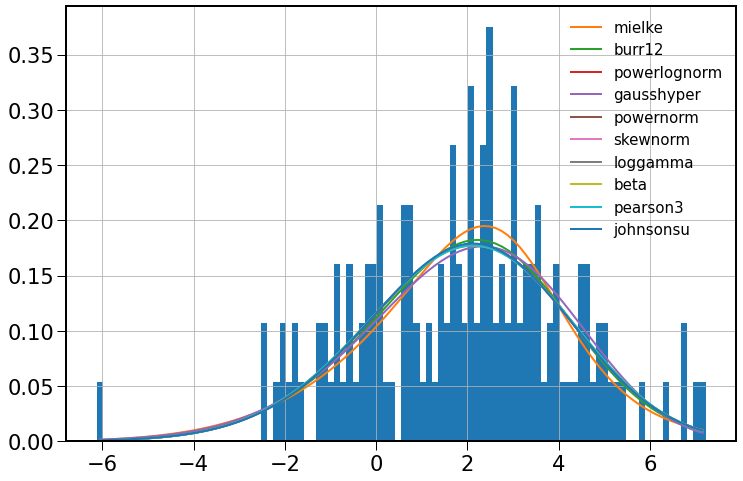

In [29]:
f_RM_vw = Fitter(dataRM['vwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_vw.fit()
f_RM_vw.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
burr,0.853091,487.013575,-694.307761,inf
johnsonsb,0.855475,478.219327,-693.917111,inf
halfgennorm,0.855717,479.298459,-698.819209,inf
kappa3,0.855813,482.283356,-698.803553,inf
exponweib,0.856034,483.294708,-693.825658,inf
gengamma,0.856345,488.062112,-693.774872,inf
gausshyper,0.857708,478.867883,-683.668911,inf
genpareto,0.857749,473.292270,-698.487075,inf
beta,0.860346,475.249115,-693.122314,inf
vonmises_line,0.867880,472.128924,-696.843295,inf


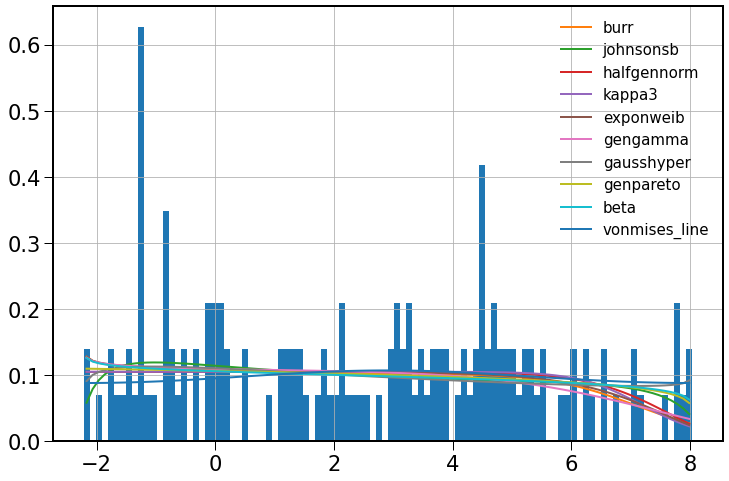

In [30]:
f_RM_uw = Fitter(dataRM['uwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_uw.fit()
f_RM_uw.summary(Nbest=10)

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


,sumsquare_error,aic,bic,kl_div
genlogistic,0.811911,536.446150,-706.176081,inf
burr,0.816591,514.151636,-700.429740,inf
skewnorm,0.817641,519.833113,-705.191468,inf
loggamma,0.821283,525.228224,-704.569308,inf
triang,0.822519,500.846867,-704.358686,inf
gumbel_l,0.823221,522.727258,-709.180918,inf
laplace_asymmetric,0.823520,543.376086,-704.188375,inf
johnsonsu,0.824817,524.682224,-699.026514,inf
pearson3,0.827627,518.761487,-703.492006,inf
burr12,0.830028,524.659555,-698.144776,inf


/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


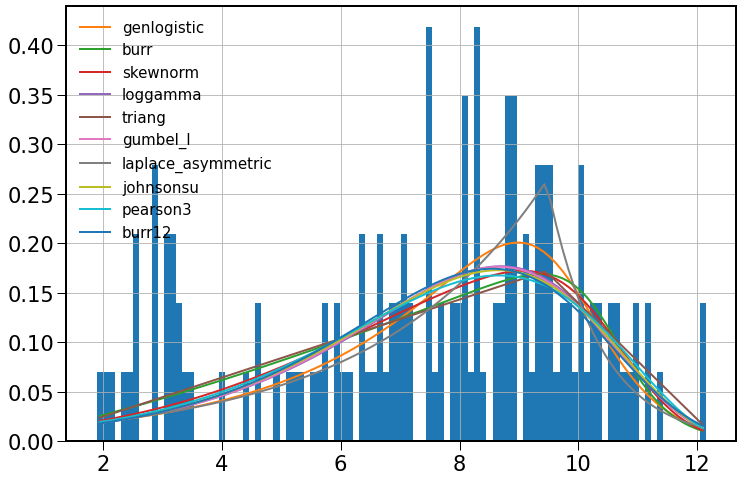

In [32]:
f_RM_gust = Fitter(dataRM['gust'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_gust.fit()
f_RM_gust.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
tukeylambda,0.822904,445.165009,-704.293214,inf
rdist,0.823145,444.489182,-704.252168,inf
johnsonsb,0.823370,449.172757,-699.272300,inf
beta,0.824384,446.145526,-699.099975,inf
semicircular,0.826112,439.772003,-708.690133,inf
gennorm,0.826859,451.901139,-703.621964,inf
gausshyper,0.828067,452.778181,-688.592708,inf
exponweib,0.832578,449.785453,-697.715263,inf
gengamma,0.833000,450.070863,-697.644468,inf
anglit,0.835196,453.285614,-707.159144,inf


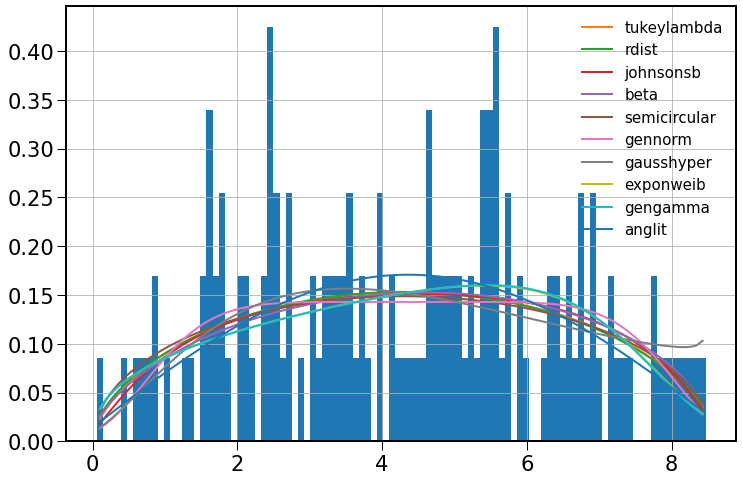

In [34]:
f_RM_sp = Fitter(dataRM['speed'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_sp.fit()
f_RM_sp.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
skewcauchy,0.000559,1343.304258,-1725.599809,inf
johnsonsu,0.000564,1326.536787,-1719.361130,inf
laplace_asymmetric,0.000595,1294.838847,-1716.797590,inf
foldcauchy,0.000642,1312.227622,-1706.232078,inf
genlogistic,0.000644,1299.580247,-1705.769956,inf
cauchy,0.000654,1337.083172,-1708.385737,inf
dweibull,0.000687,1289.917860,-1696.733372,inf
gennorm,0.000714,1296.765608,-1691.271038,inf
laplace,0.000728,1284.230902,-1693.502152,inf
loglaplace,0.000731,1284.645442,-1688.053762,inf


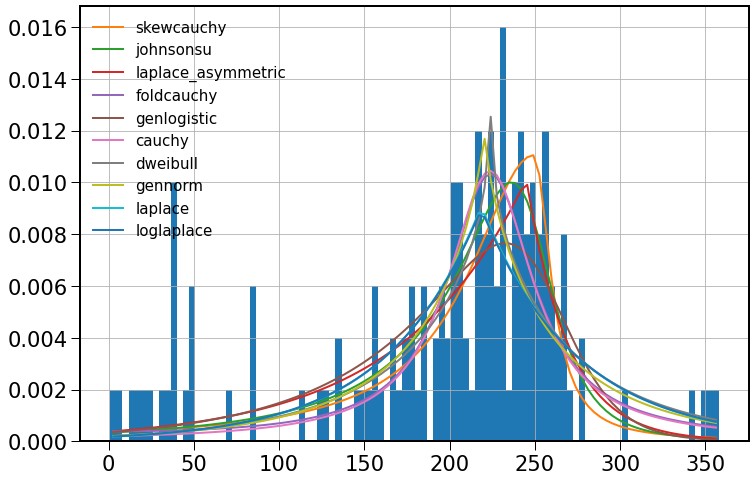

In [35]:
f_RM_dir = Fitter(dataRM['wdir'].values,
           distributions= get_distributions(),
           timeout=100)
f_RM_dir.fit()
f_RM_dir.summary(Nbest=10)

## Colorado Plateau

,sumsquare_error,aic,bic,kl_div
dweibull,1.257431,490.910683,-679.211384,inf
johnsonsb,1.273217,423.705512,-672.406310,inf
bradford,1.297558,421.362358,-674.625112,inf
gausshyper,1.303334,426.571990,-659.025749,inf
truncexpon,1.305279,423.729608,-673.758889,inf
kappa4,1.329783,420.387891,-666.059872,inf
wrapcauchy,1.332162,419.091493,-670.782456,inf
genpareto,1.337424,419.657151,-670.206936,inf
powerlaw,1.341478,420.185914,-669.765041,inf
kappa3,1.355921,423.392992,-668.201484,inf


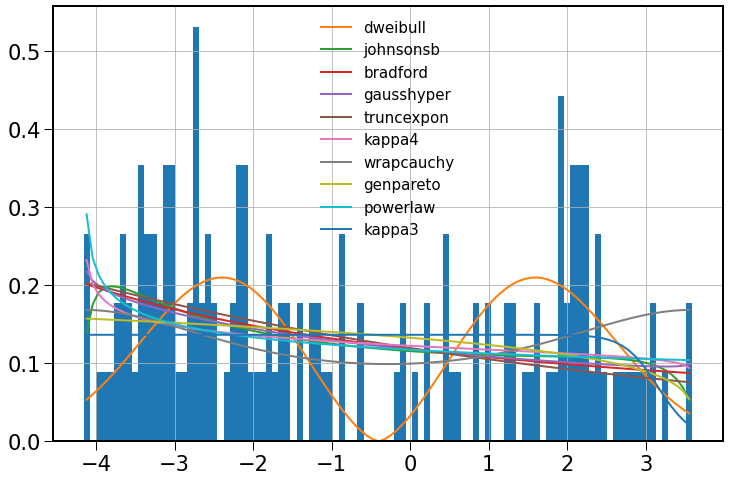

In [36]:
f_CP_vw = Fitter(dataCP['vwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_vw.fit()
f_CP_vw.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
skewcauchy,0.714892,621.495045,-761.656770,inf
laplace_asymmetric,0.720195,581.239209,-760.577734,inf
genlogistic,0.843700,578.716573,-737.469598,inf
johnsonsu,0.850727,584.124258,-731.275089,inf
burr,0.891014,560.006368,-724.519895,inf
mielke,0.900351,559.621517,-722.997815,inf
skewnorm,0.958975,553.331807,-718.771789,inf
loggamma,0.960326,557.160675,-718.566121,inf
gumbel_l,0.965628,553.429075,-722.746004,inf
weibull_min,0.970249,553.892557,-717.065373,inf


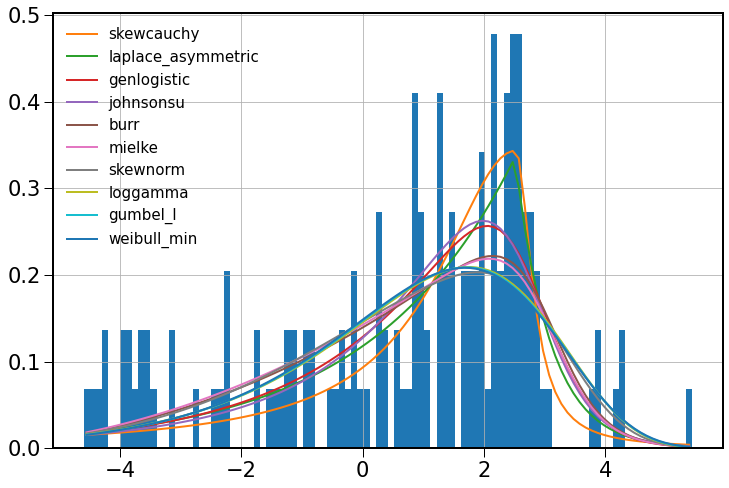

In [37]:
f_CP_uw = Fitter(dataCP['uwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_uw.fit()
f_CP_uw.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
mielke,1.837764,457.885253,-618.823887,inf
dgamma,1.863951,506.015586,-621.741801,inf
fisk,1.870678,452.414091,-621.215826,inf
vonmises_line,1.872811,489.979626,-621.049455,inf
burr,1.874056,454.532173,-615.968816,inf
exponnorm,1.874701,448.863556,-620.902144,inf
t,1.875813,501.161355,-620.815553,inf
burr12,1.885891,452.280175,-615.049708,inf
betaprime,1.888475,454.975618,-614.849742,inf
logistic,1.889224,501.803059,-624.759078,inf


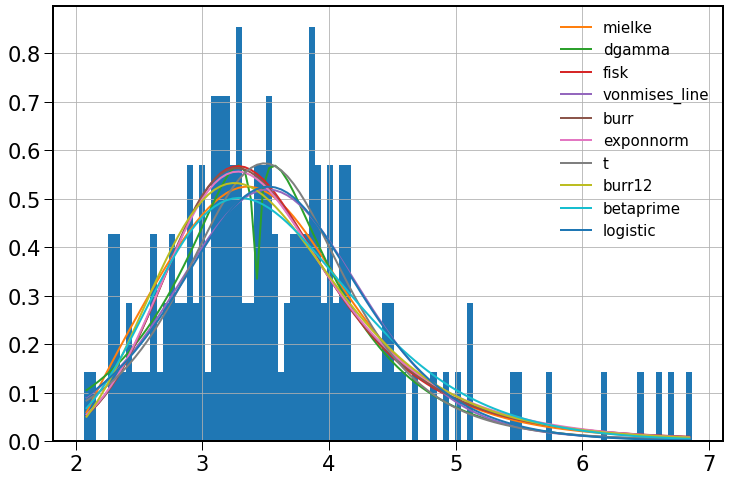

In [38]:
f_CP_gust = Fitter(dataCP['gust'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_gust.fit()
f_CP_gust.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
mielke,3.390954,419.610685,-529.389900,inf
exponnorm,3.404308,417.880100,-533.799662,inf
ncf,3.411608,430.645402,-523.519718,inf
burr,3.412693,418.662206,-528.456910,inf
fisk,3.416913,415.492946,-533.260050,inf
genhyperbolic,3.417134,433.589898,-523.283418,inf
betaprime,3.419048,421.223680,-528.185268,inf
gennorm,3.426951,454.431971,-532.831775,inf
dweibull,3.430788,446.768853,-532.668432,inf
alpha,3.432219,416.477668,-532.607528,inf


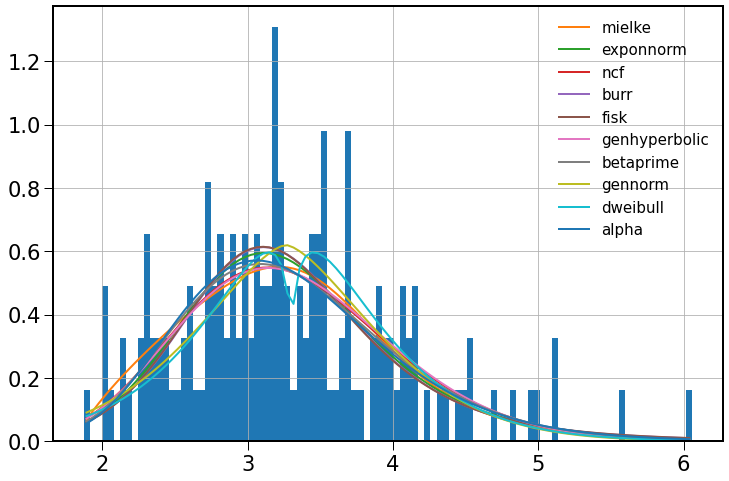

In [39]:
f_CP_speed = Fitter(dataCP['speed'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_speed.fit()
f_CP_speed.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
laplace_asymmetric,0.000667,1259.932723,-1780.350541,inf
loggamma,0.000672,1257.149873,-1779.266192,inf
genlogistic,0.000675,1258.030367,-1778.644822,inf
pearson3,0.000676,1251.115919,-1778.317723,inf
johnsonsb,0.000681,1212.118882,-1772.300129,inf
genextreme,0.000682,1246.887663,-1777.003036,inf
johnsonsu,0.000683,1268.342707,-1771.935846,inf
skewcauchy,0.000690,1294.937110,-1775.338578,inf
argus,0.000699,1232.896344,-1773.440504,inf
genhalflogistic,0.000704,1216.035850,-1772.465336,inf


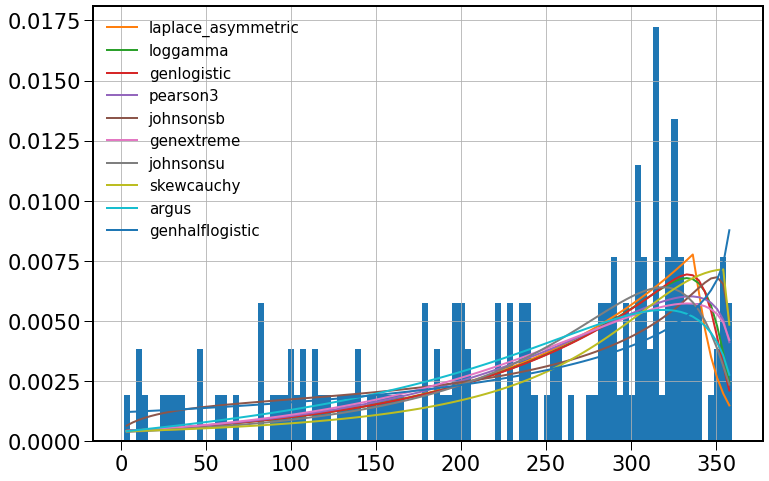

In [40]:
f_CP_dir = Fitter(dataCP['wdir'].values,
           distributions= get_distributions(),
           timeout=100)
f_CP_dir.fit()
f_CP_dir.summary(Nbest=10)

## Alta Wind Energy Center

,sumsquare_error,aic,bic,kl_div
mielke,1.074487,469.582963,-703.070886,inf
triang,1.090578,473.268190,-705.876206,inf
gompertz,1.094846,467.265127,-705.302120,inf
genhalflogistic,1.097245,452.295385,-704.980296,inf
gausshyper,1.104614,458.686951,-689.025033,inf
kappa3,1.110551,464.452624,-703.208352,inf
vonmises_line,1.118684,450.736440,-702.135774,inf
skewnorm,1.119343,491.188358,-702.049287,inf
gumbel_l,1.122005,494.219616,-706.690461,inf
genextreme,1.122880,480.237908,-701.585480,inf


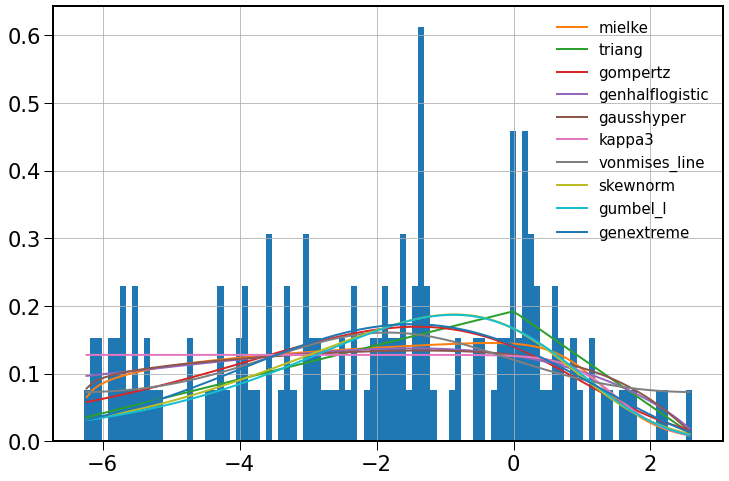

In [41]:
f_AWEC_vw = Fitter(dataAWEC['vwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_vw.fit()
f_AWEC_vw.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
t,0.954966,534.257362,-725.395982,inf
gengamma,0.954991,522.405740,-720.401683,inf
gennorm,0.955035,533.337422,-725.385407,inf
genextreme,0.955262,509.894195,-725.350374,inf
exponnorm,0.955405,534.019110,-725.328445,inf
norm,0.955405,532.017136,-730.318817,inf
crystalball,0.955405,536.017143,-720.337951,inf
genhyperbolic,0.955484,537.637178,-715.335398,inf
lognorm,0.955721,534.981900,-725.279828,inf
norminvgauss,0.955795,536.284505,-720.277980,inf


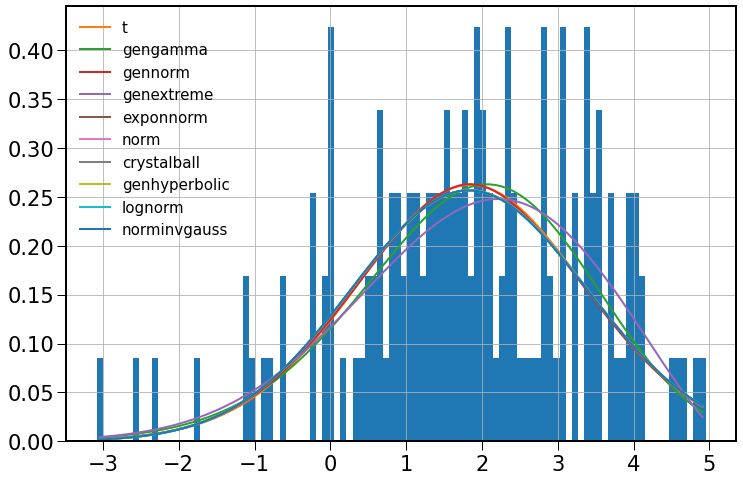

In [42]:
f_AWEC_uw = Fitter(dataAWEC['uwind'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_uw.fit()
f_AWEC_uw.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
laplace_asymmetric,0.736845,560.240043,-763.512791,inf
triang,0.771342,518.775826,-756.786977,inf
skewcauchy,0.772330,596.311583,-756.598808,inf
skewnorm,0.786152,536.925075,-753.991312,inf
genlogistic,0.786765,541.999261,-753.876685,inf
gumbel_r,0.787241,539.232213,-758.778118,inf
invweibull,0.787296,541.377712,-753.777558,inf
fisk,0.789873,547.717952,-753.297041,inf
ncx2,0.792022,539.276436,-747.907346,inf
exponnorm,0.792076,544.753871,-752.887740,inf


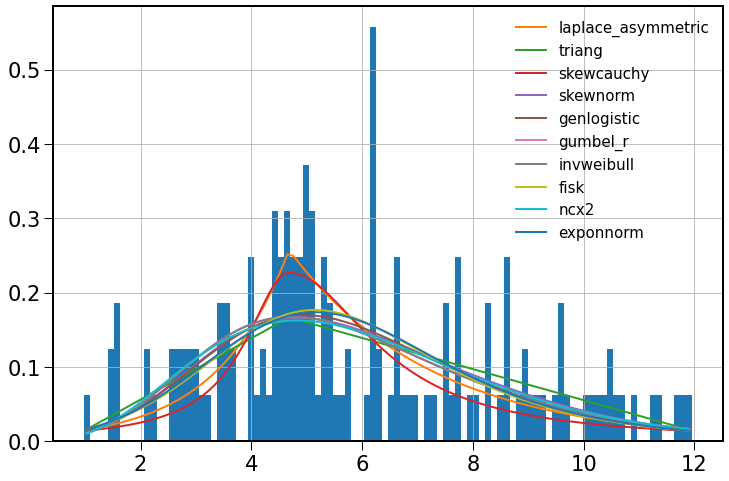

In [43]:
f_AWEC_gust = Fitter(dataAWEC['gust'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_gust.fit()
f_AWEC_gust.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
foldcauchy,1.070005,502.375267,-708.675741,inf
laplace_asymmetric,1.088258,487.860444,-706.189288,inf
skewcauchy,1.106232,525.551428,-703.781180,inf
loglaplace,1.110834,498.398618,-703.170959,inf
exponnorm,1.114621,475.399369,-702.670636,inf
fisk,1.122210,477.522675,-701.673185,inf
triang,1.124441,447.603669,-701.381200,inf
genlogistic,1.130197,468.798036,-700.630732,inf
invweibull,1.131007,468.274363,-700.525343,inf
gumbel_r,1.131051,466.348921,-705.510033,inf


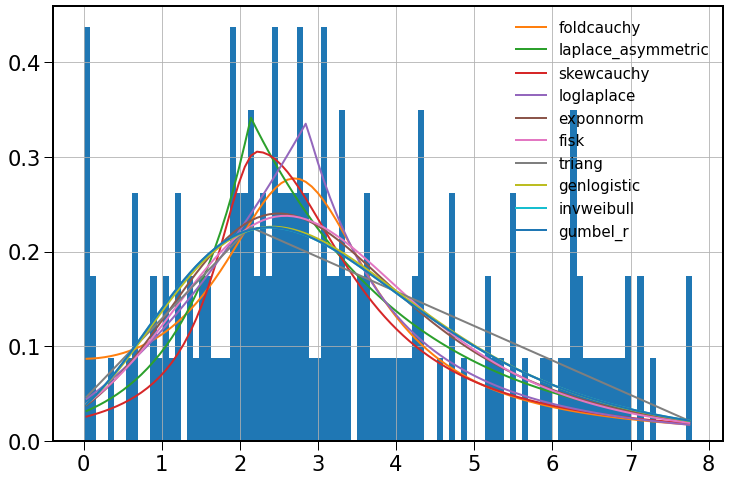

In [44]:
f_AWEC_speed = Fitter(dataAWEC['speed'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_speed.fit()
f_AWEC_speed.summary(Nbest=10)

,sumsquare_error,aic,bic,kl_div
skewcauchy,0.000873,1381.401589,-1754.029693,inf
johnsonsu,0.000893,1360.311624,-1745.702850,inf
gennorm,0.000973,1452.090805,-1738.057238,inf
dgamma,0.001005,1453.269645,-1733.391438,inf
cauchy,0.001041,1484.878516,-1733.179982,inf
laplace_asymmetric,0.001061,1330.720762,-1725.320202,inf
dweibull,0.001106,1392.981453,-1719.252977,inf
johnsonsb,0.001112,1334.839393,-1713.523882,inf
foldcauchy,0.001118,1531.152379,-1717.675080,inf
genlogistic,0.001119,1327.311780,-1717.541034,inf


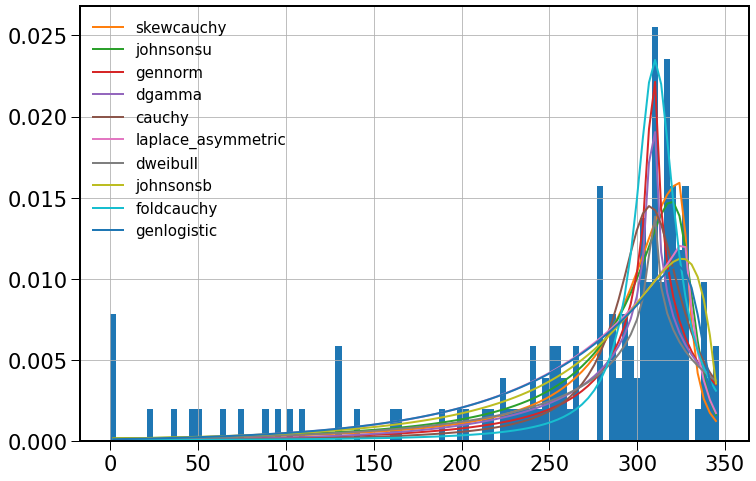

In [45]:
f_AWEC_dir = Fitter(dataAWEC['wdir'].values,
           distributions= get_distributions(),
           timeout=100)
f_AWEC_dir.fit()
f_AWEC_dir.summary(Nbest=10)